In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The flight schedule was dela...
1,✅ Trip Verified | The worst experience in all ...
2,✅ Trip Verified | The worst experience in all...
3,✅ Trip Verified | Terrible delays. Had to reb...
4,✅ Trip Verified | A serious medical problem a...


In [ ]:
df.to_csv("BA_reviews.csv")

In [4]:
df

,reviews
0,✅ Trip Verified | The flight schedule was dela...
1,✅ Trip Verified | The worst experience in all ...
2,✅ Trip Verified | The worst experience in all...
3,✅ Trip Verified | Terrible delays. Had to reb...
4,✅ Trip Verified | A serious medical problem a...
...,...
995,✅ Trip Verified | London to Amsterdam. A dela...
996,✅ Trip Verified | Gatwick to Barcelona . Chec...
997,✅ Trip Verified | I thought it time BA deserv...
998,✅ Trip Verified | Faro to Gatwick. Club check...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

### Cleaning the data

In [6]:
import re

def clean_data(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

In [7]:
df['Cleaned Reviews'] = df['reviews'].apply(clean_data)

In [8]:
df.head()

,reviews,Cleaned Reviews
0,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...
1,The worst experience in all my years of trave...,The worst experience in all my years of trave...
2,The worst experience in all my years of trav...,The worst experience in all my years of trave...
3,Terrible delays. Had to rebook our domestic ...,Terrible delays Had to rebook our domestic tr...
4,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...


In [9]:
import nltk

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet


In [13]:
pos_dict = {
    'J':wordnet.ADJ, 
    'V':wordnet.VERB, 
    'N':wordnet.NOUN, 
    'R':wordnet.ADV
}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 


In [14]:
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)

In [15]:
df.head()

,reviews,Cleaned Reviews,POS tagged
0,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on..."
1,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra..."
2,The worst experience in all my years of trav...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra..."
3,Terrible delays. Had to rebook our domestic ...,Terrible delays Had to rebook our domestic tr...,"[(Terrible, a), (delays, n), (rebook, v), (dom..."
4,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...,"[(serious, a), (medical, a), (problem, n), (ap..."


Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer

In [17]:
wordnet_lemmatizer = WordNetLemmatizer()

In [18]:
def lemma(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [19]:
df['Lemma'] = df['POS tagged'].apply(lemma)

In [20]:
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on...",flight schedule delay one hour board plane d...
1,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ...
2,The worst experience in all my years of trav...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy fligh...
3,Terrible delays. Had to rebook our domestic ...,Terrible delays Had to rebook our domestic tr...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passen...
4,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard infor...


In [21]:
df[['reviews','Lemma']]

,reviews,Lemma
0,The flight schedule was delayed for one hour....,flight schedule delay one hour board plane d...
1,The worst experience in all my years of trave...,bad experience year travel first flight two ...
2,The worst experience in all my years of trav...,bad experience year travel Bag destroy fligh...
3,Terrible delays. Had to rebook our domestic ...,Terrible delay rebook domestic travel passen...
4,A serious medical problem appeared while I w...,serious medical problem appear onboard infor...
...,...,...
995,London to Amsterdam. A delayed BA flight by ...,London Amsterdam delayed BA flight min Old a...
996,Gatwick to Barcelona . Check in efficient an...,Gatwick Barcelona Check efficient friendly h...
997,I thought it time BA deserved some complimen...,think time BA deserve compliment give many n...
998,Faro to Gatwick. Club check in was fairly qu...,Faro Gatwick Club check fairly quick priorit...


In [22]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.2 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [24]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [25]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)


In [26]:
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,The flight schedule was delayed for one hour....,The flight schedule was delayed for one hour ...,"[(flight, n), (schedule, n), (delayed, v), (on...",flight schedule delay one hour board plane d...,-0.8402,Negative
1,The worst experience in all my years of trave...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ...,-0.8910,Negative
2,The worst experience in all my years of trav...,The worst experience in all my years of trave...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy fligh...,-0.9186,Negative
3,Terrible delays. Had to rebook our domestic ...,Terrible delays Had to rebook our domestic tr...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passen...,-0.7717,Negative
4,A serious medical problem appeared while I w...,A serious medical problem appeared while I wa...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard infor...,-0.4588,Negative


In [27]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    516
Negative    378
Neutral     106
Name: Analysis, dtype: int64

### Graphical Representation Of Reviews 

([<matplotlib.patches.Wedge at 0x7f7691ca76d0>,
 [Text(-0.05526865619001674, 1.0986106569858813, 'Positive'),
  Text(-0.30689042631136276, -1.0563229933303686, 'Negative'),
  Text(1.0395692999466986, -0.3595770718612792, 'Neutral')],
 [Text(-0.030146539740009127, 0.5992421765377535, '51.60%'),
  Text(-0.16739477798801605, -0.5761761781802011, '37.80%'),
  Text(0.5670377999709264, -0.19613294828797043, '10.60%')])

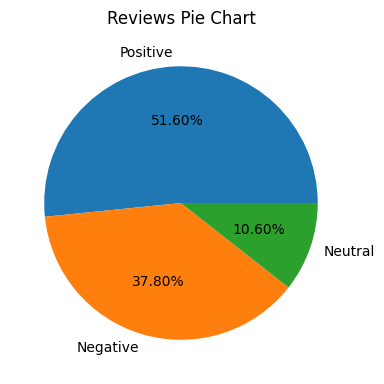

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Pie Chart")
plt.pie(vader_counts.values, labels = vader_counts.index,autopct='%1.2f%%', shadow=False)

In [30]:
df.to_csv("BA_cleaned_reviews.csv")

### WordCloud

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [32]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

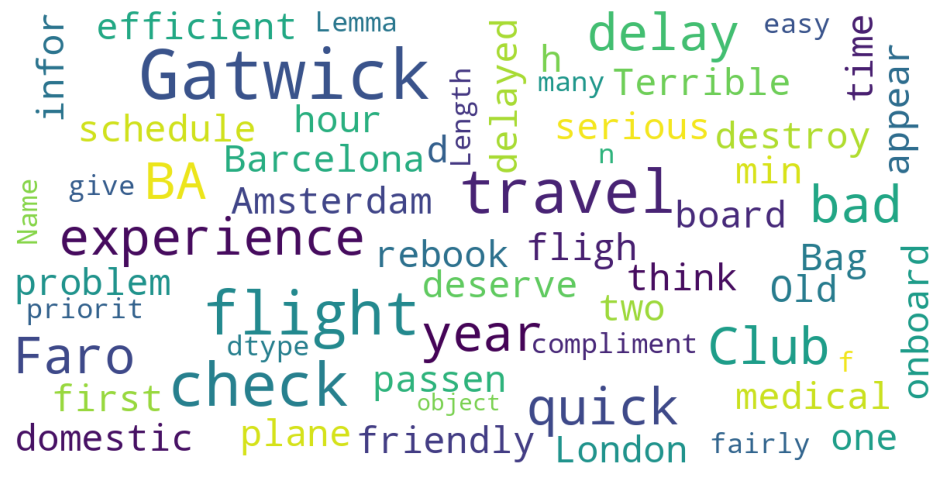

In [33]:
show_wordcloud(df.Lemma)